# Tutorial to View Spectra

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
#os.chdir(workbookDir)  # If you changed the current working dir, this will take you back to the workbook dir.

workbookDir: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/notebooks


In [5]:
import sys
sys.path.append(workbookDir)
sys.path.append(os.path.dirname(workbookDir))

In [6]:
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.logbook import LogBook
from spectractor.extractor.dispersers import *
from spectractor.extractor.spectrum import *

In [7]:
parameters.VERBOSE = True
parameters.DEBUG = True

In [8]:
#thedate="20190214"
thedate="20190215"

In [9]:
output_directory="../output/"+thedate

In [10]:
onlyfiles = [f for f in listdir(output_directory) if isfile(join(output_directory, f))]

In [11]:
onlyfiles

['T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_spectrogram.fit',
 'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_spectrogram.fit',
 'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_rot_spectrogram.fit',
 'T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_spectrogram.fits',
 'T1M_20190215_225626_007_HD116405_Filtre_None_bin1x1.2_red_rot_spectrum.fit',
 'T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_table.csv',
 'T1M_20190215_225550_730_HD116405_Filtre_None_bin1x1.1_red_rot_spectrum.fit',
 'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_spectrum.fit',
 'T1M_20190215_225701_284_HD116405_Filtre_None_bin1x1.3_red_rot_table.csv',
 'T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_table.csv',
 'T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_spectrum.fit',
 'T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_spectrum.fits',
 'T1M_20190215_225811_838_HD116405_Filtre_None_

In [12]:
sdfqsd

NameError: name 'sdfqsd' is not defined

In [13]:
fullfilename=os.path.join(output_directory,onlyfiles[11])

In [14]:
fullfilename

'../output/20190215/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_spectrum.fits'

In [15]:
s = Spectrum()
s.load_spectrum(fullfilename)

2019-03-29 21:07:36  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      RA_PREC ... SP_TYPE SP_QUAL SP_BIBCODE
             "h:m:s"       "d:m:s"            ...                           
--------- ------------- ------------- ------- ... ------- ------- ----------
HD 116405 13 22 45.1237 +44 42 53.911      14 ...     A0V       C           
2019-03-29 21:07:36  Spectrum   load_spectrum        INFO   
	Loading disperser Holo150ROTPDM19...
2019-03-29 21:07:36  Spectrum   load_spectrum        INFO   
	Spectrum loaded from ../output/20190215/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_spectrum.fits
2019-03-29 21:07:36  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from ../output/20190215/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_spectrogram.fits


Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_003.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_002.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_004.fits
Loading /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/calspec/hd116405_stis_001.fits
Load disperser Holo150ROTPDM19:
	from /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/spectractor/extractor/dispersers/Holo150ROTPDM19
Grating characteristics:
	N = 150.00 +/- 1.14 grooves/mm
	Average tilt of 0.0 degrees


2019-03-29 21:07:36  Spectrum   load_chromatic_psf   INFO   
	Spectrogram loaded from ../output/20190215/T1M_20190215_225811_838_HD116405_Filtre_None_bin1x1.5_red_rot_table.csv


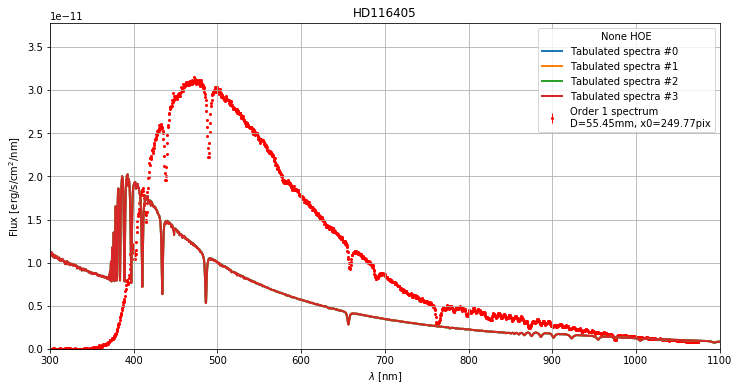

In [16]:
s.plot_spectrum(xlim=None)